In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error,classification_report,confusion_matrix

#### Realiza los siguientes pasos:

- Análisis descriptivo de los datos:
    - De las variables numéricas, halla datos estadísticos.
    - De las variables categóricas, lista las diferentes categorías y halla la frecuencia de cada una de ellas. 
    - Crea matriz de correlaciones existentes entre las variables numéricas del conjunto de datos, analiza los resultados. 
- Tratamiento de missing. Si existen valores faltantes, decide si eliminar los registros, llenarlos con valores como la media, la mediana o la moda y justifique tu respuesta. 
- Aplica árboles y random forest al problema de regresión.
- Compara, mediante las medidas que te parezcan adecuadas, la capacidad predictiva de ambos métodos. 
- Comenta las ventajas y desventajas de cada modelo. De acuerdo con los resultados, son realmente útiles los modelos creados para el conjunto de datos propuesto. 
- Para el ejercicio de clasificación, tanto para Árboles como para random forest, se crean los siguientes grupos: grupo1 SalePrice menor o igual a 100.000, grupo2 SalePrice entre 100.001 y 500.000 y grupo3 SalePrice mayor o igual a 500001. 
- Compara los resultados de los dos clasificadores y comenta los resultados. 
- Otros comentarios que consideres adecuados.


## Data Information

The following information is the description for each column in the dataset

- **MSSubClass**: Building class
- **MSZoning**: Zoning classification
- **LotFrontage**: Linear feet of street connected to the property
- **LotArea**: Lot size in square feet
- **Street**: Type of road access
- **Alley**: Type of alley access
- **LotShape**: Lot shape
- **LandContour**: Flatness of the property
- **Utilities**: Available utilities
- **LotConfig**: Lot configuration
- **LandSlope**: Slope of the property
- **Neighborhood**: Physical location within the city limits of Ames
- **Condition1**: Proximity to main road or railroad
- **Condition2**: Proximity to main road or railroad (if there's a second)
- **BldgType**: Type of dwelling
- **HouseStyle**: Style of dwelling
- **OverallQual**: Overall material and finish quality
- **OverallCond**: Overall condition
- **YearBuilt**: Original construction year
- **YearRemodAdd**: Remodel year
- **RoofStyle**: Type of roof
- **RoofMatl**: Roof material
- **Exterior1st**: Exterior covering of the house
- **Exterior2nd**: Exterior covering of the house (if more than one material)
- **MasVnrType**: Masonry veneer type
- **MasVnrArea**: Masonry veneer area in square feet
- **ExterQual**: Exterior material quality
- **ExterCond**: Exterior material condition
- **Foundation**: Foundation type
- **BsmtQual**: Basement height
- **BsmtCond**: General condition of the basement
- **BsmtExposure**: Walkout or garden level walls
- **BsmtFinType1**: Quality of basement finished area (Type 1)
- **BsmtFinSF1**: Finished square feet (Type 1)
- **BsmtFinType2**: Quality of second finished area (if any)
- **BsmtFinSF2**: Finished square feet (Type 2)
- **BsmtUnfSF**: Unfinished square feet in basement
- **TotalBsmtSF**: Total basement square feet
- **Heating**: Type of heating
- **HeatingQC**: Heating quality and condition
- **CentralAir**: Central air conditioning
- **Electrical**: Electrical system
- **1stFlrSF**: First floor square feet
- **2ndFlrSF**: Second floor square feet
- **LowQualFinSF**: Low-quality finished square feet (all floors)
- **GrLivArea**: Above-grade (ground) living area square feet
- **BsmtFullBath**: Basement full bathrooms
- **BsmtHalfBath**: Basement half bathrooms
- **FullBath**: Full bathrooms above grade
- **HalfBath**: Half bathrooms above grade
- **Bedroom**: Number of bedrooms above basement level
- **Kitchen**: Number of kitchens
- **KitchenQual**: Kitchen quality
- **TotRmsAbvGrd**: Total rooms above grade (excluding bathrooms)
- **Functional**: Home functionality rating
- **Fireplaces**: Number of fireplaces
- **FireplaceQu**: Fireplace quality
- **GarageType**: Garage location
- **GarageYrBlt**: Year garage was built
- **GarageFinish**: Interior finish of the garage
- **GarageCars**: Garage capacity in number of cars
- **GarageArea**: Garage size in square feet
- **GarageQual**: Garage quality
- **GarageCond**: Garage condition
- **PavedDrive**: Paved driveway
- **WoodDeckSF**: Wood deck area in square feet
- **OpenPorchSF**: Open porch area in square feet
- **EnclosedPorch**: Enclosed porch area in square feet
- **3SsnPorch**: Three-season porch area in square feet
- **ScreenPorch**: Screened porch area in square feet
- **PoolArea**: Pool area in square feet
- **PoolQC**: Pool quality
- **Fence**: Fence quality
- **MiscFeature**: Miscellaneous feature not covered in other categories
- **MiscVal**: Dollar value of miscellaneous feature
- **MoSold**: Month sold
- **YrSold**: Year sold
- **SaleType**: Type of sale
- **SaleCondition**: Sale conditions


## Descriptive data analysis

I'll read the `.CSV` file with pandas to start the analysis

In [4]:
houses = pd.read_csv('housing_train.csv')

Now we can see that the dataset has 1,460 rows and 81 columns.

In [5]:
houses.shape

(1460, 81)

Let's see the first 5 rows of the pandas Dataframe

In [6]:
houses.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


Let's list all the columns

In [12]:
houses.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

Now, let's dig in to the data structure 🔍

In [8]:
print(houses.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

### Missing Data and Feature Types

- We have a total of 80 columns (excluding the Id column)
- It can be observed that **not all features contain the full 1,460 non-null entries**.
- Several features have the **`object` data type**, which we will need to inspect and potentially **transform into a more suitable representation** for the machine learning algorithms we will be using.

- Some features, such as:
  - `Alley`
  - `PoolQC`
  - `Fence`
  - `MiscFeature`  
  contain a **very low number of non-null values**, which may not be enough to be considered useful for our analysis or modeling.

Let's get unique values per column, excluding the `Id` column and the target variable `SalePrice`, which is important to note for our modeling process.

In [14]:
for col in houses.columns.drop(['Id', 'SalePrice']):
    unique_vals = houses[col].unique()
    print(f"{col} ({houses[col].dtype}): {len(unique_vals)} unique values")
    print(f"  Sample values: {unique_vals[:10]}")
    print()

MSSubClass (int64): 15 unique values
  Sample values: [ 60  20  70  50 190  45  90 120  30  85]

MSZoning (object): 5 unique values
  Sample values: ['RL' 'RM' 'C (all)' 'FV' 'RH']

LotFrontage (float64): 111 unique values
  Sample values: [65. 80. 68. 60. 84. 85. 75. nan 51. 50.]

LotArea (int64): 1073 unique values
  Sample values: [ 8450  9600 11250  9550 14260 14115 10084 10382  6120  7420]

Street (object): 2 unique values
  Sample values: ['Pave' 'Grvl']

Alley (object): 3 unique values
  Sample values: [nan 'Grvl' 'Pave']

LotShape (object): 4 unique values
  Sample values: ['Reg' 'IR1' 'IR2' 'IR3']

LandContour (object): 4 unique values
  Sample values: ['Lvl' 'Bnk' 'Low' 'HLS']

Utilities (object): 2 unique values
  Sample values: ['AllPub' 'NoSeWa']

LotConfig (object): 5 unique values
  Sample values: ['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3']

LandSlope (object): 3 unique values
  Sample values: ['Gtl' 'Mod' 'Sev']

Neighborhood (object): 25 unique values
  Sample values: ['

We can also observe:

- There are **numeric variables** of type integer or float, such as:

    - `MSSubClass`, `LotFrontage`, `LotArea`, and `YrSold`
    - These variables can be useful for a regression model.

- There are also **categorical variables** like:

    - `MSZoning`, `Street`, `Alley`, `LotShape`, `LandCointour`, `Utilities`, `SaleType` and `SaleCondition`
    - These features are more appropriate for **classification tasks** or one-hot encoding.    

- Some variables **appear to be numeric** but should be treated as **categorical**, such as:

    - `YearBuilt` and `YearRemodAdd`
    - These are **year-based features** and do not support meaningful arithmetic operations.

Let's sort these variables into a ranking to visualize them more clearly. The following comamnd gives me the top 12 columns in the houses DataFrame with **the most missing values.**


In [15]:
houses.isna().sum().sort_values(ascending=False).head(12)

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
MasVnrType       872
FireplaceQu      690
LotFrontage      259
GarageQual        81
GarageFinish      81
GarageType        81
GarageYrBlt       81
GarageCond        81
dtype: int64

We can see that there are variables with at least 10% of the total 1,460 entries being null. This is a good indication that they could be removed:

1. **PoolQC**
2. **MiscFeature**
3. **Alley**
4. **Fence**
5. **FireplaceQu**
6. **LotFrontage**


In [21]:
# que paso con MasVnrType ???????????????????????????

to_remove = ['PoolQC','MiscFeature','Alley','Fence','FireplaceQu','LotFrontage']

## Continuing the Analysis

We now create a DataFrame that includes only the numeric columns by using `select_dtypes`.  
After that, we display descriptive statistics for these numeric features using the `.describe()` method to better understand their distribution and central tendencies.

In [23]:
houses_nums = houses.select_dtypes(exclude=['object'])

In [24]:
with pd.option_context('display.max_columns', None):
    print(houses_nums.describe())

                Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726   
std       1.112799    30.202904     20.645407   181.066207   456.098091   
min       1.000

### Feature Selection Considerations

We can remove the `Id` column since it doesn't contribute useful information to the model.  Similarly, `SalePrice` will be removed later, as it is the target variable we aim to predict.

We also observe that some columns have a very low standard deviation, which indicates limited variability in their values.  Such features, like `YrSold` and `MoSold`, may not provide meaningful information for the model and could be considered for removal.


In [25]:
to_remove.extend(['Id', 'YrSold', 'MoSold'])

### Frequency and Summary Statistics of Categorical Variables

Now let's look at the frequencies and summary statistics of the categorical variables.
This will help us understand the most common categories, detect potential imbalances, and identify any issues such as missing values or rare categories.


In [26]:
houses_categ = houses.select_dtypes(include=['object'])

In [30]:
with pd.option_context('display.max_columns', None):
    print(houses_categ.describe())

       MSZoning Street Alley LotShape LandContour Utilities LotConfig  \
count      1460   1460    91     1460        1460      1460      1460   
unique        5      2     2        4           4         2         5   
top          RL   Pave  Grvl      Reg         Lvl    AllPub    Inside   
freq       1151   1454    50      925        1311      1459      1052   

       LandSlope Neighborhood Condition1 Condition2 BldgType HouseStyle  \
count       1460         1460       1460       1460     1460       1460   
unique         3           25          9          8        5          8   
top          Gtl        NAmes       Norm       Norm     1Fam     1Story   
freq        1382          225       1260       1445     1220        726   

       RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType ExterQual  \
count       1460     1460        1460        1460        588      1460   
unique         6        8          15          16          3         4   
top        Gable  CompShg     VinylS

#### Variables with Few Unique Values

Variables such as `Street`, `Alley`, and `Utilities` stand out for having very few unique values.


In [36]:
for item in houses_categ:
    print("\n* Categorical frequencies:", item)
    print(houses_categ[item].value_counts())


* Categorical frequencies: MSZoning
MSZoning
RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: count, dtype: int64

* Categorical frequencies: Street
Street
Pave    1454
Grvl       6
Name: count, dtype: int64

* Categorical frequencies: Alley
Alley
Grvl    50
Pave    41
Name: count, dtype: int64

* Categorical frequencies: LotShape
LotShape
Reg    925
IR1    484
IR2     41
IR3     10
Name: count, dtype: int64

* Categorical frequencies: LandContour
LandContour
Lvl    1311
Bnk      63
HLS      50
Low      36
Name: count, dtype: int64

* Categorical frequencies: Utilities
Utilities
AllPub    1459
NoSeWa       1
Name: count, dtype: int64

* Categorical frequencies: LotConfig
LotConfig
Inside     1052
Corner      263
CulDSac      94
FR2          47
FR3           4
Name: count, dtype: int64

* Categorical frequencies: LandSlope
LandSlope
Gtl    1382
Mod      65
Sev      13
Name: count, dtype: int64

* Categorical frequencies: Neighborhood
Neighborhood
NA

Based on the results, I will remove all variables with low categorical frequencies, as they do not show much variability.

I will also remove duplicate features.


In [32]:
to_remove.extend(['Street', 'Alley', 'Utilities'])


to_remove = list(set(to_remove))
print(to_remove)


['Alley', 'Fence', 'Id', 'YrSold', 'FireplaceQu', 'MiscFeature', 'Street', 'PoolQC', 'LotFrontage', 'MoSold', 'Utilities']


Now, let's remove the variables from the DataFrame.


In [37]:
houses_v2 = houses.drop(to_remove,axis='columns')

In [38]:
houses_v2.head(8)

,MSSubClass,MSZoning,LotArea,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SaleType,SaleCondition,SalePrice
0,60,RL,8450,Reg,Lvl,Inside,Gtl,CollgCr,Norm,Norm,...,0,61,0,0,0,0,0,WD,Normal,208500
1,20,RL,9600,Reg,Lvl,FR2,Gtl,Veenker,Feedr,Norm,...,298,0,0,0,0,0,0,WD,Normal,181500
2,60,RL,11250,IR1,Lvl,Inside,Gtl,CollgCr,Norm,Norm,...,0,42,0,0,0,0,0,WD,Normal,223500
3,70,RL,9550,IR1,Lvl,Corner,Gtl,Crawfor,Norm,Norm,...,0,35,272,0,0,0,0,WD,Abnorml,140000
4,60,RL,14260,IR1,Lvl,FR2,Gtl,NoRidge,Norm,Norm,...,192,84,0,0,0,0,0,WD,Normal,250000
5,50,RL,14115,IR1,Lvl,Inside,Gtl,Mitchel,Norm,Norm,...,40,30,0,320,0,0,700,WD,Normal,143000
6,20,RL,10084,Reg,Lvl,Inside,Gtl,Somerst,Norm,Norm,...,255,57,0,0,0,0,0,WD,Normal,307000
7,60,RL,10382,IR1,Lvl,Corner,Gtl,NWAmes,PosN,Norm,...,235,204,228,0,0,0,350,WD,Normal,200000


### Correlation Matrix

Now let's review which variables have the highest correlations and see if there are any other columns that can be removed.


<Axes: >

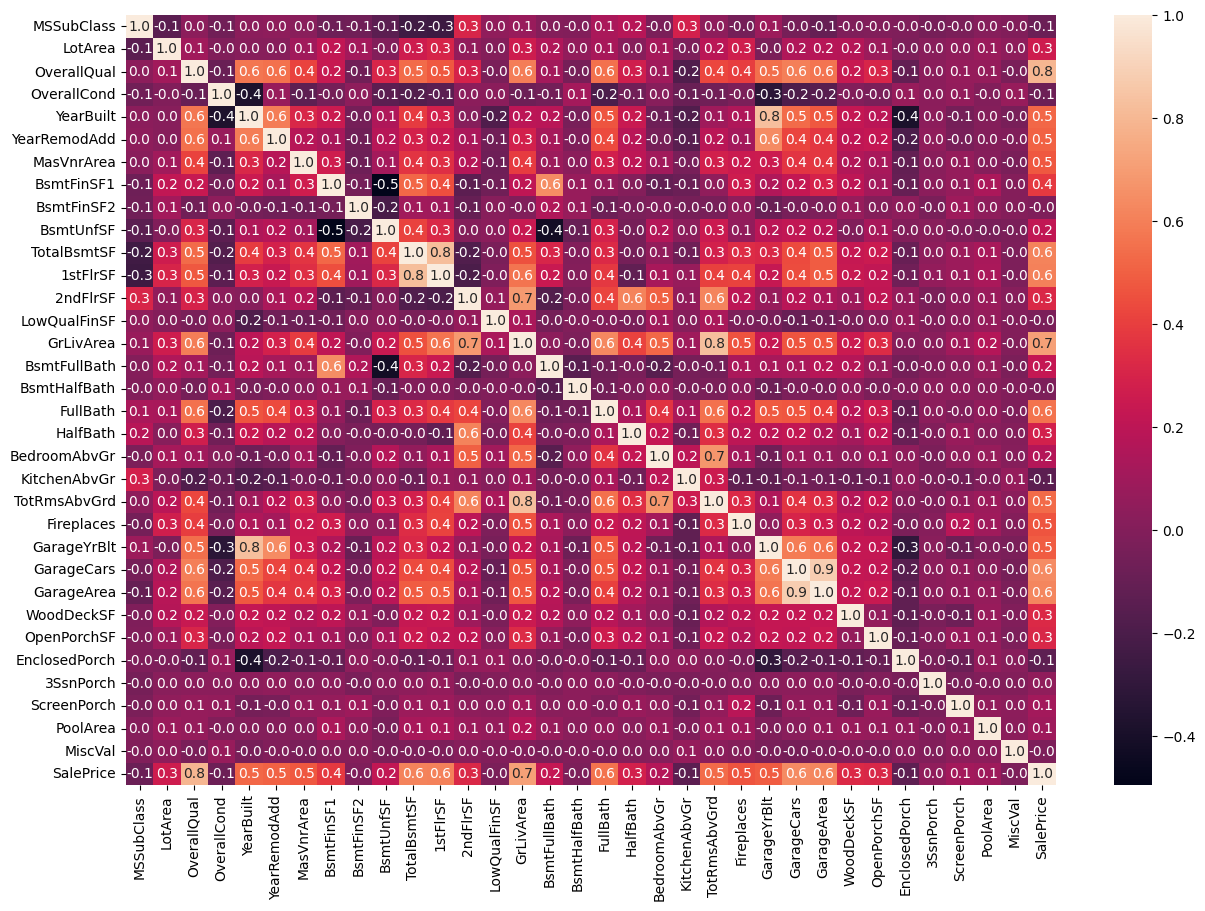

In [39]:
plt.figure(figsize=(15,10))
sns.heatmap(houses_v2.corr(numeric_only=True),annot=True,fmt='.1f')

- Variables such as `OverallQual` and `GrLivArea` are strongly correlated. Based on their definitions:

    1. **OverallQual:** overall quality of materials and finish
    2. **GrLivArea:** above-ground living area in square feet

- Considering that both the quality of a house’s materials and its living area can be relevant factors influencing the final price, I will not remove these features.

### Handling Missing Values

Let's continue with the issue of columns containing missing values.

The first step will be to remove the `SalePrice` column so it can be used later for regression and classification tasks.



In [40]:
y = houses_v2['SalePrice']
X = houses_v2.drop('SalePrice',axis=1)

Now, we will impute the missing values.

- For the **categorical variables**, I will impute the missing values using the mode.  
- For the **numerical variables**, I will impute the missing values using the median.

After that, the label values will be converted to numeric format so they can be used in regression.


In [41]:
modelo = LabelEncoder()

# Categorical variables
columnas = X.select_dtypes(include='object').columns
for item in columnas:
    moda = X[item].mode()[0]
    X[item] = X[item].fillna(moda)
    
    # discretizar
    X[item] = modelo.fit_transform(X[item])

# Numerical variables
columnas = X.select_dtypes(exclude='object').columns
for item in columnas:
    mediana = X[item].median()
    X[item] = X[item].fillna(mediana)

X.head(3)

,MSSubClass,MSZoning,LotArea,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SaleType,SaleCondition
0,60,3,8450,3,3,4,0,5,2,2,...,2,0,61,0,0,0,0,0,8,4
1,20,3,9600,3,3,2,0,24,1,2,...,2,298,0,0,0,0,0,0,8,4
2,60,3,11250,0,3,4,0,5,2,2,...,2,0,42,0,0,0,0,0,8,4


## Decision Tree Regression Results and Analysis

In this section, we explore the performance of **Decision Tree Regression models** on our dataset. 

Decision Trees are a popular choice for regression tasks due to their simplicity and interpretability. However, they can be prone to overfitting, especially when the trees are deep or complex. We'll examine the impact of pruning on the model's performance, comparing the results of an unpruned tree with a pruned tree to determine which approach yields better predictions. 

The model's performance will be evaluated using the Root Mean Squared Error (RMSE) metric. The RMSE measures the average difference between predicted and actual values. **A lower RMSE indicates better model performance.**

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,random_state=1)

In [43]:
arboles_1 = DecisionTreeRegressor() # without pruning
arboles_1.fit(X_train, y_train)
y_pred_1 = arboles_1.predict(X_test)

In [44]:
arboles_2 = DecisionTreeRegressor(max_depth=5) # limited depth
arboles_2.fit(X_train, y_train)
y_pred_2 = arboles_2.predict(X_test)

In [45]:
print('RMSE of the unpruned tree: ',np.sqrt(mean_squared_error(y_test, y_pred_1)))
print('RMSE of the pruned tree:',np.sqrt(mean_squared_error(y_test, y_pred_2)))

RMSE of the unpruned tree:  39999.368461898055
RMSE of the pruned tree: 34321.151357432645


Comparing the two RMSE values:
- The unpruned tree has an RMSE of approximately 40,000.
- The pruned tree has an RMSE of approximately 34,321.

**The pruned tree has a lower RMSE**, which suggests that pruning the `DecisionTreeRegressor` improved its performance by reducing overfitting. The model is now generalizing better to unseen data. The reduction of about `5,678` in RMSE indicates a notable improvement in the model's accuracy.

## Random Forest Regression

In this section, we investigate the performance of **Random Forest Regression models** on our dataset. Random Forests are an ensemble learning method that combines multiple Decision Trees to improve the accuracy and robustness of predictions. By aggregating the predictions of multiple trees, **Random Forests can reduce overfitting** and **capture complex relationships** in the data. 

We'll evaluate the performance of the Random Forest model using the RMSE metric and compare its results to those of the Decision Tree models. 

This will help us determine whether the ensemble approach provides a significant improvement in predictive power.

In [46]:
bosque_aleatorio = RandomForestRegressor()
modelo_ba1 = bosque_aleatorio.fit(X_train, y_train)
y_pred_3 = modelo_ba1.predict(X_test)

In [47]:
bosque_aleatorio = RandomForestRegressor(n_estimators=50, random_state=1) # limited number of trees
model_ba2 = bosque_aleatorio.fit(X_train, y_train)
y_pred_4 = model_ba2.predict(X_test)

In [48]:
print('RMSE of Random Forest Model 1:',np.sqrt(mean_squared_error(y_test, y_pred_3)))
print('RMSE of Random Forest Model 2:',np.sqrt(mean_squared_error(y_test, y_pred_4)))

RMSE of Random Forest Model 1: 24495.1020855257
RMSE of Random Forest Model 2: 26129.540424085626


The RMSE values indicate the average difference between predicted and actual values for each Random Forest model.

Comparing the two models:

- Random Forest Model 1 has a lower RMSE (24,495) compared to Model 2 (26,130), suggesting that **Model 1 performs better**.

Comparing these results to the Decision Trees:

- The best Decision Tree model (pruned tree) had an RMSE of approximately 34,321.
- Both Random Forest models have lower RMSE values than the best Decision Tree model, indicating that **the Random Forest approach is performing better** and providing more accurate predictions. Model 1 shows the best performance overall so far.

## Classification Problem: Decision Tree vs Random Forest

To address the classification problem, we divided the target variable `SalePrice` into three categories:
- **Group 1**: SalePrice ≤ 100,000  
- **Group 2**: SalePrice between 101,000 and 500,000  
- **Group 3**: SalePrice ≥ 501,000

We applied a decision tree classifier and obtained the following confusion matrix on the test set.

You may calculate the accuracy for each group based on this matrix. Consider the conclusions that can be drawn from these results and whether Group 3 might require special handling due to its characteristics.

Next, we applied a random forest classifier, and the resulting confusion matrix on the test set was:

Again, compute the accuracy for each group and compare these results with those from the decision tree. Reflect on the improvements, if any, and suggest potential enhancements based on the findings.


In [57]:
groups = [0,100000, 500000,10000000000]
label_names = ['group1','group2','group3']

y_new = pd.cut(y, groups, labels=label_names)

In [58]:
nuevo_df = pd.concat([y, y_new],axis=1)
nuevo_df.columns = ['y','y_new']

nuevo_df['y_new'].value_counts(normalize=True)

y_new
group2    0.909589
group1    0.084247
group3    0.006164
Name: proportion, dtype: float64

- It seems that 90% of the data is in Group 2.

- The groups should be defined in a way that each one has more representative values, for example:

    *Each group could have 33% of the data*

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y_new, test_size=0.25, random_state=1)

In [60]:
modelo_1 = DecisionTreeClassifier(random_state=1)
modelo_1.fit(X_train, y_train)
y_pred_1 = modelo_1.predict(X_test)

In [61]:
print(confusion_matrix(y_test, y_pred_1))
print(classification_report(y_test, y_pred_1))

[[ 18  18   0]
 [ 16 307   4]
 [  0   0   2]]
              precision    recall  f1-score   support

      group1       0.53      0.50      0.51        36
      group2       0.94      0.94      0.94       327
      group3       0.33      1.00      0.50         2

    accuracy                           0.90       365
   macro avg       0.60      0.81      0.65       365
weighted avg       0.90      0.90      0.90       365



- There isn't enough data to train Group 3, according to what the support metric shows.
- It is imbalanced.

In [62]:
modelo_2 = RandomForestClassifier(random_state=1)
modelo_2.fit(X_train, y_train)
y_pred_2 = modelo_2.predict(X_test)

In [63]:
print(confusion_matrix(y_test, y_pred_2))
print(classification_report(y_test, y_pred_2, zero_division=0))

[[ 19  17   0]
 [  3 324   0]
 [  0   2   0]]
              precision    recall  f1-score   support

      group1       0.86      0.53      0.66        36
      group2       0.94      0.99      0.97       327
      group3       0.00      0.00      0.00         2

    accuracy                           0.94       365
   macro avg       0.60      0.51      0.54       365
weighted avg       0.93      0.94      0.93       365



A class (like grupo3) exists in y_test but your model never predicts it in y_pred_2

In [64]:
print("Labels in y_test:", np.unique(y_test))
print("Labels in y_pred_2:", np.unique(y_pred_2))

Labels in y_test: ['group1' 'group2' 'group3']
Labels in y_pred_2: ['group1' 'group2']


- Group 3 has very low frequency, according to the value shown by the support metric.
- The data should also be balanced.

- In both decision trees and random forests, Group 2 shows a better F1-score compared to the other two groups.

## Additional Comments

- Random Forest shows better results on the data compared to Decision Trees.
- The classification groups need to be balanced, as there wasn’t enough data to train groups 1 and 2.
- More features could be removed using the `VarianceThreshold` function from scikit-learn.